In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Separate the feature and target sets
df.drop(columns=['RowNumber','CustomerId','Surname','Geography','Gender'],inplace=True)

y = df['Exited'].values
x = df.loc[:,df.columns != 'Exited'].values

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


<Axes: ylabel='count'>

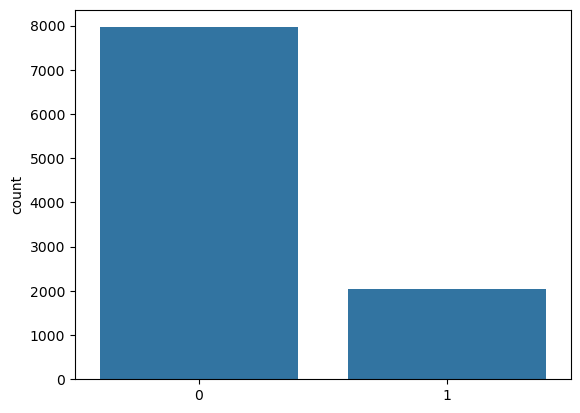

In [8]:
import seaborn as sns
sns.countplot(x=y)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)


In [13]:
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'),  # Input layer
    keras.layers.Dense(32, activation='relu'),                              # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')                             # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)


C:\Users\Shubham\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7544 - loss: 0.5144
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8470 - loss: 0.3931
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8455 - loss: 0.3696
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8489 - loss: 0.3662
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.3384
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8536 - loss: 0.3468
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8564 - loss: 0.3439
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8566 - loss: 0.3465
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.3506
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3400


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8588
Confusion Matrix:
[[1932   71]
 [ 282  215]]


# To implement the improvement

In [21]:
model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),  # Input layer with the same number of features
    keras.layers.Dense(128, activation='relu'),    # Increased the number of neurons in the first hidden layer
    keras.layers.Dropout(0.3),                    # Added dropout to prevent overfitting
    keras.layers.Dense(64, activation='relu'),     # Added another hidden layer
    keras.layers.BatchNormalization(),             # Batch normalization layer
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Step 5: Print the accuracy score and confusion matrix
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6494 - loss: 0.6437 - val_accuracy: 0.8320 - val_loss: 0.4148
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8190 - loss: 0.4245 - val_accuracy: 0.8480 - val_loss: 0.3670
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8366 - loss: 0.3897 - val_accuracy: 0.8467 - val_loss: 0.3553
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8362 - loss: 0.3819 - val_accuracy: 0.8453 - val_loss: 0.3647
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8420 - loss: 0.3842 - val_accuracy: 0.8480 - val_loss: 0.3485
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8430 - loss: 0.3743 - val_accuracy: 0.8467 - val_loss: 0.3503
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8425 - loss: 0.3771 - val_accuracy: 0.8400 - val_loss: 0.3570
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8498 - loss: 0.3688 - val_accuracy: 0.